# Libraries

In [68]:
import numpy as np
import pandas as pd
# sm - https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9
#import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.svm import SVC
#Which search to use?
from sklearn.model_selection import GridSearchCV#, RandomizedSearchCV
#For max_depth
from sklearn.tree import DecisionTreeClassifier, plot_tree

np.random.seed(50)

#Plotting Params

%matplotlib inline

#plt.rcParams['figure.figsize'] = [20.0, 7.0]
#plt.rcParams.update({'font.size': 22,})

#sns.set_palette('viridis')
#sns.set_style('white')
#sns.set_context('talk', font_scale=0.8)

In [108]:
#Get all data
data = pd.read_csv(r'assignment1-2019-data.csv')
from sklearn.datasets import load_digits, load_iris, load_breast_cancer

digits = load_digits()
iris = load_iris()
breast_cancer = load_breast_cancer()

#Hyperparameters
max_depth = 8 #about 30s for digits


# Tuning Maximum Depth

- Specify Parameters before running
- Value impacts quality and performance of model
- Goal is to maximise **performance** and **intelligibility**
- Rule for performance vs complexity
    - Maximum depth can increase by 1 for 2% improvement in accuracy
- Dividing data into k-folds can be done by sklearn?
    - Using 6-folds
- Mximum depth as a measure of complexity


In [103]:
#Code for Hyper-parameter Tuning goes here.
#Not using this, used to get my head around 

def get_h_params(dataset):

    n_samples = len(dataset.data)
    X = dataset.data.reshape((n_samples, -1))
    y = dataset.target

    kf_data = KFold(n_splits = 6)

    #Split data by kfold
    for train_index, test_index in kf_data.split(X):
        #print("TRAIN:", train_index, "\n", "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        #Set the parameters by cv
        tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                             'C': [1, 10, 100, 1000]},
                            {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
        
        scores = ['precision', 'recall']
        
        for score in scores:
            for score in scores:
                print("# Tuning hyper-parameters for %s." % score, 
                      "this may take a while...")
                print()

                clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                                   scoring='%s_macro' % score)
                clf.fit(X_train, y_train)

                print("Best parameters set found on development set:")
                print()
                print(clf.best_params_)
                print()
                print("Grid scores on development set:")
                print()
                means = clf.cv_results_['mean_test_score']
                stds = clf.cv_results_['std_test_score']
                for mean, std, params in zip(means, stds, clf.cv_results_['params']):
                    print("%0.3f (+/-%0.03f) for %r"
                          % (mean, std * 2, params))
                print()

                print("Detailed classification report:")
                print()
                print("The model is trained on the full development set.")
                print("The scores are computed on the full evaluation set.")
                print()
                y_true, y_pred = y_test, clf.predict(X_test)
                print(classification_report(y_true, y_pred))
                print()
        

In [104]:
#test
#get_h_params(breast_cancer)

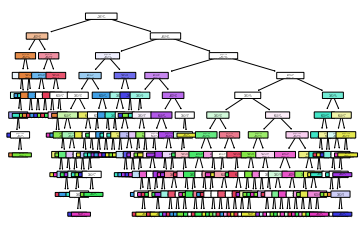

In [110]:
dataset = digits

n_samples = len(dataset.data)
X = dataset.data.reshape((n_samples, -1))
y = dataset.target
kf_data = KFold(n_splits = 6)
for train_index, test_index in kf_data.split(X):
        #print("TRAIN:", train_index, "\n", "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        estimator = DecisionTreeClassifier(max_depth=max_depth) #max_depth global
        estimator.fit(X_train, y_train)
        
        #Tree structure arrays
        n_nodes = estimator.tree_.node_count
        children_left = estimator.tree_.children_left #id of left children
        children_right = estimator.tree_.children_right #id of right children
        feature = estimator.tree_.feature #feature used for splitting node
        threshold = estimator.tree_.threshold #thsh value at the node
        
        #Plot
        plot_tree(estimator.fit(dataset.data, dataset.target), filled = True, rounded = True) 


In [97]:
print(breast_cancer.data.shape)

# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

##Prints the data of the first 5 (Yus!)
#print(df.head())

breast_cancer.target[[11, 50, 90]]

print (len(breast_cancer.data))

(569, 30)
569


# DT vs Linear Models

- Hypothesis which performs well on one class of problems may be bad on another.
- Need to **Construct a binary classsification problem**
    - Define a function that describes the class lable of a point.
    - We know T/F value since we define the problem.
    - Generate training and testing data where P and N represent the + and - classes.
- Investigate how tree sizes affect performance
- Create visualisation of actual and learned class boundaries
- Discuss what would happen if the problem was Rd instead of R2

~~~
DTree(examples, features) # returns a tree
    if all examples are in one class:
        return a leaf node with that class label;
    elif the set of features is empty:
        return a leaf node with the most common class label in examples;
    else:
        create a new decision (condition) node R;
        pick a categorical feature F (or a numeric feature and a threshold);
        for each possible outcome v_i of R:
            add an out-going edge E_v_i to node R;
            let examples_i be the subset of examples that result in outcome v_i;
            if examples_i is empty:
                attach to E_v_i a leaf node (label) that is 
                                the most common in examples;
            else:
                attach to E_v_i the result of DTree(examples_i, features \ {F});
        return the subtree rooted at R.
~~~

In [6]:
#DT

# Regression on Mixed Data Types

- Given data set for a regression problem
- Need to train linear regression model
- Needs to be linear in weights and features 
- Has a categorical feature with more than two levels
- Use entire dataset for training
- Needs to output
    - Mean Squared Error
    - R^2
    - Round coefficients to intigers
    - Write a case based definition of the functions identified
        - Linear expression of input variables
        - One expression per level of variable
    - Describe how regression was used
    - How a new datapoint can be assigned a predicted value

In [7]:
#Code for Regression goes here.